In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

In [2]:
# First lets define a function that takes an input waist location and waist size
def bmag(x, pkb=None):
    waist = x[0]
    z0 = hw*10
    if(z0<1.0):
        z0 = 1.0
    dz = 0.5
    betas = x[1]
    N = int(z0*100)
    sigma = hw/(np.sqrt(2*np.log(2)))
    beta0 = betas+(z0+waist)**2/betas
    alpha0 = (z0+waist)/betas
    gb0 = 20000
    ne0 = 0.5
    dgdz0 = 16.7e9/me/1e6
    dgdz0 = 0.0
    z, frac = profile.plasma_gaussian_ramps(z0, dz, sigma, sigma, N, z0)
    ne = frac*0.5
    beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
    kp = 5.95074e4 * np.sqrt(ne0)
    kb = kp/np.sqrt(2*gb[-1])
    Bmag = 0.5*(beta[-1]*kb+gamma[-1]/kb)
    if pkb is not None:
        return kb
    return Bmag

In [3]:
N = 100
hwA = np.linspace(0.0, 1.0, N)
zs = np.zeros(N)
bs = np.zeros(N)
bm = np.zeros(N)
kb = np.zeros(N)
x0 = [0.0, 0.0048]
for i in range(N):
    hw = hwA[i]
    res = minimize(bmag, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    kb[i] = bmag(x0, pkb=True)
    zs[i] = res.x[0]
    bs[i] = res.x[1]
    bm[i] = res.fun
    x0 = res.x
print("Maximum Bmag %0.6f" % np.amax(bm))

../../python/lens/profile.py:55: RuntimeWarning: divide by zero encountered in true_divide
  frac[sel] = peak*np.exp(-(z[sel]-d2)**2/(2*sigmaIn**2))
../../python/lens/profile.py:55: RuntimeWarning: invalid value encountered in true_divide
  frac[sel] = peak*np.exp(-(z[sel]-d2)**2/(2*sigmaIn**2))


Maximum Bmag 1.000000


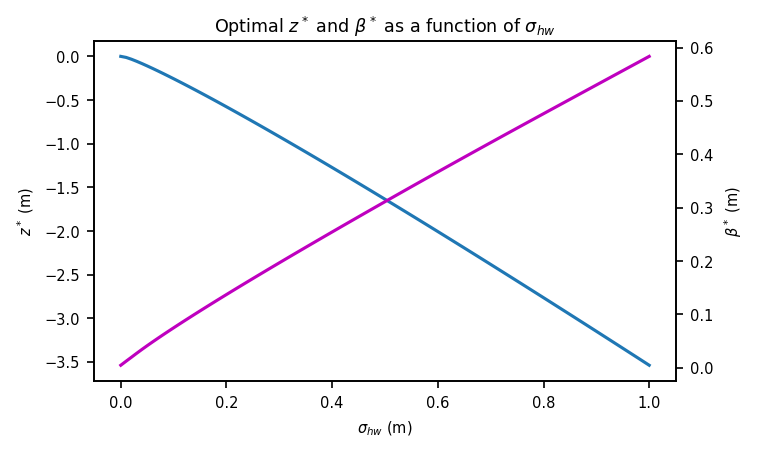

Matched size: 4.75E-03


In [4]:
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(hwA, zs)
plt.title(r'Optimal $z^*$ and $\beta^*$ as a function of $\sigma_{hw}$')
plt.ylabel(r'$z^*$ (m)')
plt.xlabel(r'$\sigma_{hw}$ (m)')
plt.twinx()
plt.plot(hwA, bs, 'm')
plt.ylabel(r'$\beta^*$ (m)')
plt.show()
print('Matched size: %0.2E' % bs[0])

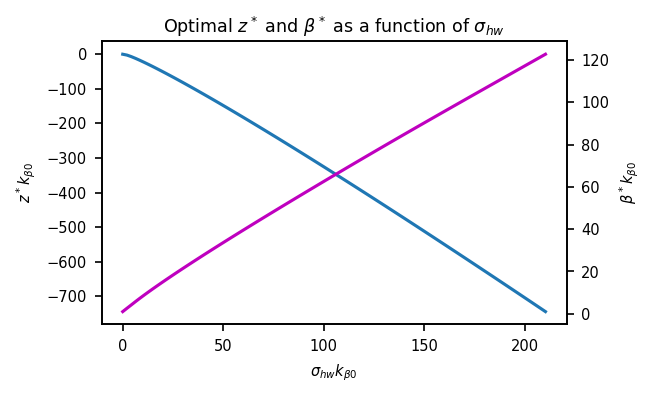

Matched size: 1.00E+00


In [5]:
# Recreating the plot in normalized coordinates
plt.figure(figsize=(4, 2.5), dpi=150)
plt.plot(hwA*kb, zs*kb)
plt.title(r'Optimal $z^*$ and $\beta^*$ as a function of $\sigma_{hw}$')
plt.ylabel(r'$z^*k_{\beta0}$')
plt.xlabel(r'$\sigma_{hw}k_{\beta0}$')
plt.twinx()
plt.plot(hwA*kb, bs*kb, 'm')
plt.ylabel(r'$\beta^*k_{\beta0}$')
plt.show()
print('Matched size: %0.2E' % (bs[0]*kb[0]))

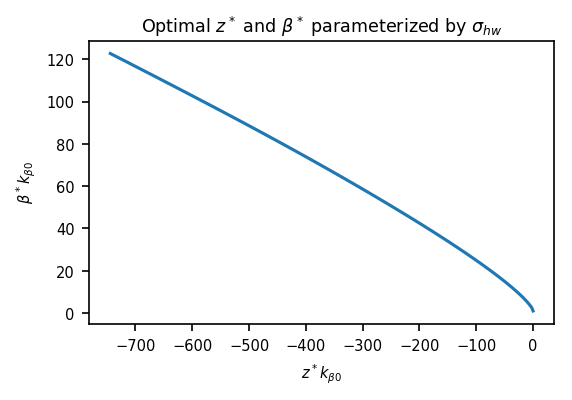

In [6]:
# Finally, I want to plot the waist vs its location
# Recreating the plot in normalized coordinates
plt.figure(figsize=(4, 2.5), dpi=150)
plt.plot(zs*kb, bs*kb)
plt.title(r'Optimal $z^*$ and $\beta^*$ parameterized by $\sigma_{hw}$')
plt.ylabel(r'$\beta^*k_{\beta0}$')
plt.xlabel(r'$z^*k_{\beta0}$')
plt.show()

../../python/lens/profile.py:55: RuntimeWarning: divide by zero encountered in true_divide
  frac[sel] = peak*np.exp(-(z[sel]-d2)**2/(2*sigmaIn**2))
../../python/lens/profile.py:55: RuntimeWarning: invalid value encountered in true_divide
  frac[sel] = peak*np.exp(-(z[sel]-d2)**2/(2*sigmaIn**2))


Maximum Bmag 1.000000


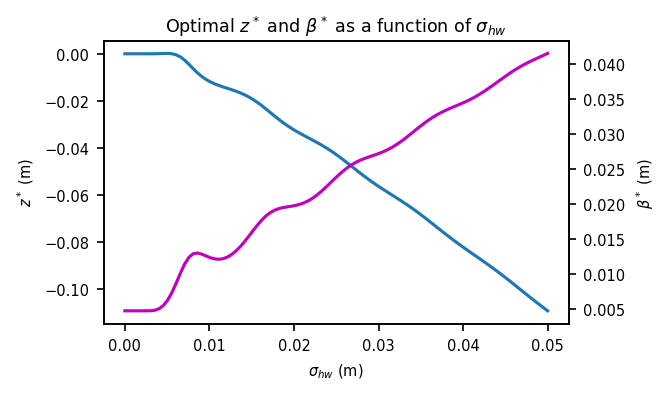

Matched size: 4.75E-03


In [7]:
# Let's look closely at the situation around 0 length
N = 100
hwA = np.linspace(0.0, 0.05, N)
zs = np.zeros(N)
bs = np.zeros(N)
bm = np.zeros(N)
x0 = [0.0, 0.0048]
for i in range(N):
    hw = hwA[i]
    res = minimize(bmag, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    zs[i] = res.x[0]
    bs[i] = res.x[1]
    bm[i] = res.fun
    x0 = res.x
print("Maximum Bmag %0.6f" % np.amax(bm))
plt.figure(figsize=(4, 2.5), dpi=150)
plt.plot(hwA, zs)
plt.title(r'Optimal $z^*$ and $\beta^*$ as a function of $\sigma_{hw}$')
plt.ylabel(r'$z^*$ (m)')
plt.xlabel(r'$\sigma_{hw}$ (m)')
plt.twinx()
plt.plot(hwA, bs, 'm')
plt.ylabel(r'$\beta^*$ (m)')
plt.show()
print('Matched size: %0.2E' % bs[0])

In [8]:
def bmag(x, pkb=None):
    waist = x[0]
    z0 = hw*3
    if(z0<1.0):
        z0 = 1.0
    dz = 0.5
    betas = x[1]
    N = int(z0*50)
    sigma = hw/(np.sqrt(2*np.log(2)))
    beta0 = betas+(z0+waist)**2/betas
    alpha0 = (z0+waist)/betas
    gb0 = 20000
    ne0 = 0.5
    dgdz0 = 16.7e9/me/1e6
    dgdz0 = 0.0
    z, frac = profile.plasma_linear_ramps(z0, dz, sigma, sigma, N, z0)
    ne = frac*0.5
    beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
    kp = 5.95074e4 * np.sqrt(ne0)
    kb = kp/np.sqrt(2*gb[-1])
    Bmag = 0.5*(beta[-1]*kb+gamma[-1]/kb)
    if pkb is not None:
        return kb
    return Bmag

In [9]:
N = 1000
hwA = np.linspace(0.0, 0.5, N)
zs = np.zeros(N)
bs = np.zeros(N)
bm = np.zeros(N)
kb = np.zeros(N)
x0 = [0.0, 0.0048]
for i in range(N):
    hw = hwA[i]
    res = minimize(bmag, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    kb[i] = bmag(x0, pkb=True)
    zs[i] = res.x[0]
    bs[i] = res.x[1]
    bm[i] = res.fun
    x0 = res.x
print("Maximum Bmag %0.6f" % np.amax(bm))

../../python/lens/profile.py:105: RuntimeWarning: invalid value encountered in true_divide
  frac[sel] = peak*(z[sel]-d2)/(2*sigmaIn) + peak


Maximum Bmag 1.000000


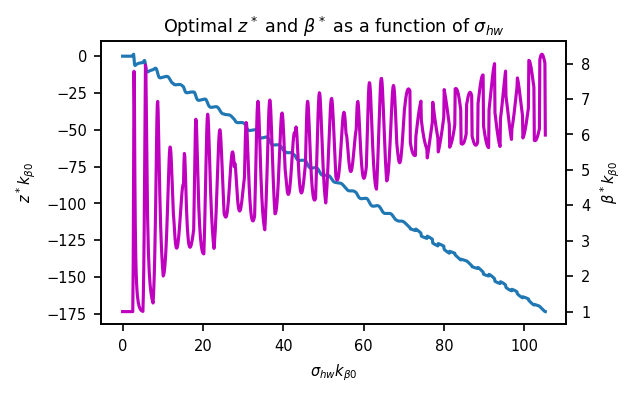

Matched size: 1.00E+00


In [10]:
# Recreating the plot in normalized coordinates
plt.figure(figsize=(4, 2.5), dpi=150)
plt.plot(hwA*kb, zs*kb)
plt.title(r'Optimal $z^*$ and $\beta^*$ as a function of $\sigma_{hw}$')
plt.ylabel(r'$z^*k_{\beta0}$')
plt.xlabel(r'$\sigma_{hw}k_{\beta0}$')
plt.twinx()
plt.plot(hwA*kb, bs*kb, 'm')
plt.ylabel(r'$\beta^*k_{\beta0}$')
plt.show()
print('Matched size: %0.2E' % (bs[0]*kb[0]))